# Galaxy Clustering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits import mplot3d
from random import sample 
import scipy.integrate as integrate
import seaborn as sns
import random
np.random.seed(1)
%matplotlib inline
import time

In [2]:
R,r = 30,1.5 #in units of h^{-1}Mpc
N,n,nsample = 2500,50,50

In [3]:
int1,int2 = 24,24
xdata = np.random.uniform(-int1,int1,N)
ydata = np.random.uniform(-int2,int2,N)#np.random.random(N)*1000
xcenters = np.random.uniform(-int1,int1,n)
ycenters = np.random.uniform(-int2,int2,n)
xsample = np.random.choice(xdata, nsample)
ysample = np.random.choice(ydata, nsample)

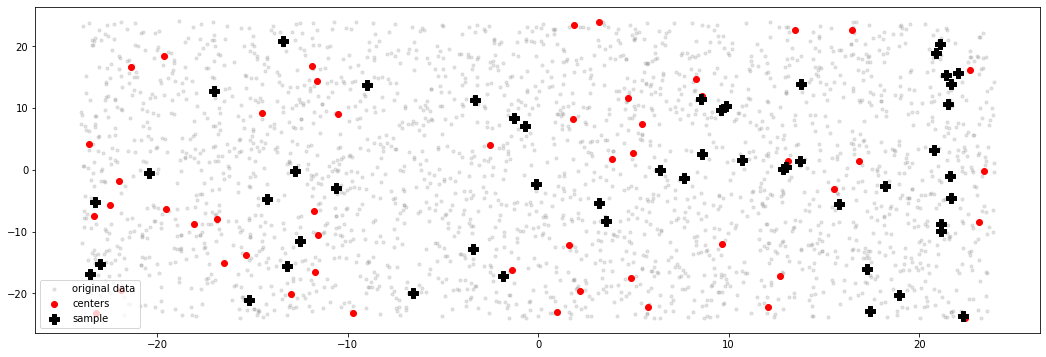

In [4]:
plt.figure(figsize=(18,6))
plt.scatter(xdata, ydata, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()
plt.show()

In [5]:
data = pd.DataFrame({'x':xdata,'y':ydata})
data_c = pd.DataFrame({'x':xcenters,'y':ycenters})
data_s = data.sample(nsample)

In [ ]:
data = pd.DataFrame({'x':xdata,'y':ydata})
data_c = pd.DataFrame({'x':xcenters,'y':ycenters})
data_s = data.sample(nsample)
plt.figure(figsize=(18,6))
plt.scatter(data.x,data.y,label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(data_c.x,data_c.y,label="centers",color='r')
plt.scatter(data_s.x,data_s.y,label="sample",color='k',marker='P',s=100)
plt.legend()
plt.show()

The nearest neighbor function $G(r)$ is the distribution function of the distance $r$ of a point (existing in the data) to the nearest other point, while the spherical contact distribution $F(r)$ is the distribution function of the distance $r$ of an arbitrary point in the space (not necessarily existing in the data) to the nearest point in the data [34]. In addition, another function, $J(r)$, has been suggested by van Lieshout and Baddeley in 1996 [35], $J(r)=\frac{1-G(r)}{1-F(r)}$, as a better nonparametric test to determine whether data were from a Poisson process.

Jiang S, Park S, Challapalli SD, Fei J, Wang Y (2017) Robust nonparametric quantification of clustering density of molecules in single-molecule localization microscopy. PLoS ONE 12(6): e0179975. https://doi.org/10.1371/journal.pone.0179975

In [6]:
A = np.transpose(np.array([xdata, ydata]))
B = np.transpose(np.array([xcenters, ycenters]))
C = np.transpose(np.array([xsample, ysample]))

In [7]:
inicio = time.time()


##################
m = len(A)
n = len(B)
dist_f = np.zeros((n,m))
for j in range(0,n):
    d = np.sqrt((B[j,0]-A[:,0])**2+(B[j,1]-A[:,1])**2)
    dist_f[j,:] = d
    
dist_f = dist_f.flatten()    
 
fin = time.time()

print(dist_f, len(dist_f))
##################


print(fin-inicio)

[16.15577678  9.53056905 32.89083749 ... 24.93317082 15.9499008
 22.46654855] 125000
0.00561213493347168


In [9]:
inicio = time.time()


##################
m = len(A)
h = len(C)
dist_g = np.zeros((h,m))
for j in range(0,h):
    d = np.sqrt((C[j,0]-A[:,0])**2+(C[j,1]-A[:,1])**2)
    dist_g[j,:] = d
    
dist_g = dist_g.flatten()    
 
fin = time.time()

print(dist_g, len(dist_g))
##################


print(fin-inicio)

[34.92427961 20.84557322 28.83816201 ... 16.10423622 35.43641709
  5.36033538] 125000
0.0036716461181640625


In [ ]:
dist_f.min(), dist_f.max(), dist_g.min(), dist_g.max(), np.count_nonzero(dist_f)

In [8]:
inicio = time.time()

#################

dist_f = []
for RR_i, RR in enumerate(data_c.iterrows()):
    for rr_j, rr in enumerate(data.iterrows()):
        dd = np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        dist_f.append(dd)
dist_f = np.array(dist_f)

##################
fin = time.time()

print(dist_f, len(dist_f))
print(fin-inicio)

[16.15577678  9.53056905 32.89083749 ... 24.93317082 15.9499008
 22.46654855] 125000
6.363007307052612


In [10]:
inicio = time.time()

#################

dist_g = []
for RR_i, RR in enumerate(data_s.iterrows()):
    for rr_j, rr in enumerate(data.iterrows()):
        dd = np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        dist_g.append(dd)
dist_g = np.array(dist_g)

##################
fin = time.time()

print(dist_g, len(dist_g))
print(fin-inicio)

[14.902314    9.43401247 28.65561426 ... 13.79642333 35.28982748
  2.97180024] 125000
7.049591779708862


In [11]:
dist_f.min(), dist_f.max(), dist_g.min(), dist_g.max(), np.count_nonzero(dist_f)

(0.03332482072402404, 66.27042243324787, 0.0, 64.05219533380026, 125000)

In [ ]:
def area_in(d,R,r):
    t1=r**2*np.arccos((d**2+r**2-R**2)/(2*d*r))
    t2=R**2*np.arccos((d**2+R**2-r**2)/(2*d*R))
    t3=np.sqrt((-d+r+R)*(d+r-R)*(d-r+R)*(d+r+R))/2
    return t1+t2+t3

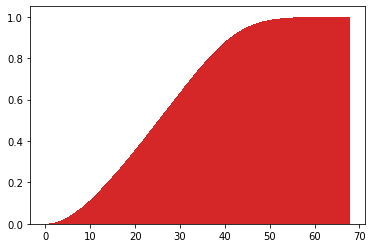

In [12]:
rs_f = plt.hist(dist_f, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_r = plt.hist(dist_f, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_g = plt.hist(dist_g, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_r = plt.hist(dist_g, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

In [ ]:
print(np.shape(rs_f))
print(rs_f)
print(np.shape(F_r))
print(F_r)

In [13]:
J_r=(1-G_r)/(1-F_r)

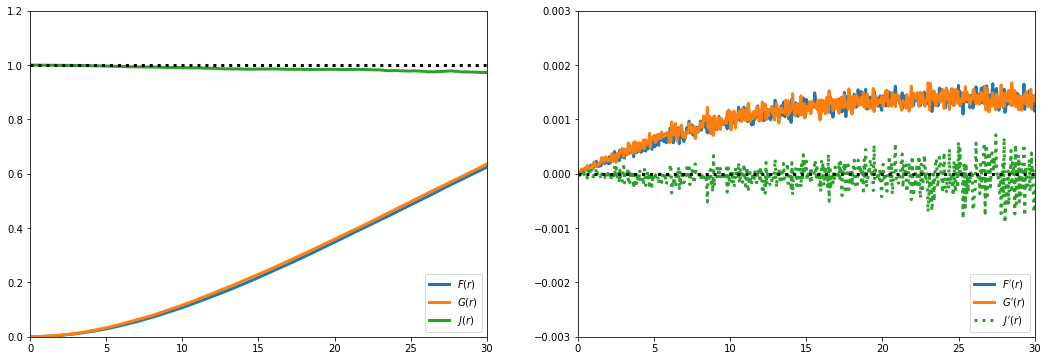

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(rs_f[:-1], F_r,label=r"$F(r)$", lw=3)
plt.plot(rs_g[:-1], G_r,label=r"$G(r)$", lw=3)
plt.plot(rs_f[:-1], J_r,label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(1,2,2)
plt.plot(rs_f[:-2], np.diff(F_r), label=r"$F'(r)$", lw=3)
plt.plot(rs_g[:-2], np.diff(G_r), label=r"$G'(r)$", lw=3)
plt.plot(rs_f[:-2], np.diff(J_r), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0, lw=3, linestyle=':', color='k')
plt.xlim(0, 30)
plt.ylim(-0.003, 0.003)
plt.legend(loc=4)

plt.show()

In [ ]:
circle_r = 4
circle_x = np.array([-20,-10,20,5,-3])#np.random.randint(-int1,int1,5)
circle_y = np.array([10,-10,0,-18,12])#np.random.randint(-int1,int1,5)
# random angle
#alpha = 2 * np.pi * np.random.random(500)
# random radius
#r = circle_r * np.random.random(500)
#circle_x


In [ ]:
circle_x

In [ ]:
# calculating coordinates
x_poisson,y_poisson = [],[]
for i, j in zip(circle_x, circle_y):
    # random angle
    alpha = 2 * np.pi * np.random.random(3500)
    # random radius
    r = circle_r * np.random.random(3500)
    x1 = r * np.cos(alpha) + i
    y1 = r * np.sin(alpha) + j
    #print(i,j,x1,y1)
    x_poisson.append(x1)
    y_poisson.append(y1)
x_poisson, y_poisson = np.array(x_poisson), np.array(y_poisson)

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(xdata, ydata, label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(x_poisson, y_poisson, label="grouped data", color='b', alpha=0.2, s=10)
plt.scatter(circle_x, circle_y, label="centers grouped data", color='r', alpha=0.9, s=10)
#plt.scatter(data_c.x,data_c.y,label="centers",color='r')
#plt.scatter(data_s.x,data_s.y,label="sample",color='k',marker='P',s=100)
plt.legend()
plt.show()

In [ ]:
xdata_new = np.concatenate((xdata, x_poisson[0], x_poisson[1], x_poisson[2], x_poisson[3], x_poisson[4]))
ydata_new = np.concatenate((ydata, y_poisson[0], y_poisson[1], y_poisson[2], y_poisson[3], y_poisson[4]))

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(xdata_new, ydata_new, label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()
plt.show()

In [ ]:
D = np.transpose(np.array([xdata_new, ydata_new]))

In [ ]:
inicio = time.time()


##################
k = len(D)
n = len(B)
dist_f_new = np.zeros((n,k))
for j in range(0,n):
    d = np.sqrt((B[j,0]-D[:,0])**2+(B[j,1]-D[:,1])**2)
    dist_f_new[j,:] = d
    
dist_f_new = dist_f_new.flatten()    
 
fin = time.time()

print(dist_f_new, len(dist_f_new))
##################


print(fin-inicio)

In [ ]:
inicio = time.time()


##################
k = len(D)
h = len(C)
dist_g_new = np.zeros((h,k))
for j in range(0,h):
    d = np.sqrt((C[j,0]-D[:,0])**2+(C[j,1]-D[:,1])**2)
    dist_g_new[j,:] = d
    
dist_g_new = dist_g_new.flatten()    
 
fin = time.time()

print(dist_g_new, len(dist_g_new))
##################


print(fin-inicio)

In [ ]:
data_new = pd.DataFrame({'x':xdata_new, 'y':ydata_new})
data_c = pd.DataFrame({'x':xcenters, 'y':ycenters})
data_s = data_new.sample(nsample)


inicio = time.time()


##################

dist_f_new=[]
for RR_i, RR in enumerate(data_c.iterrows()):
    for rr_j, rr in enumerate(data_new.iterrows()):
        dd=np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        #if dd<=R*1.2:
        #print(RR_i, RR[1][0], RR[1][1], rr_j, rr[1][0], rr[1][1], dd)
        dist_f_new.append(dd)
dist_f_new=np.array(dist_f_new)

fin = time.time()

print(dist_f_new, len(dist_f_new))
##################


print(fin-inicio)

In [ ]:
inicio = time.time()


##################

dist_g_new=[]
for RR_i, RR in enumerate(data_s.iterrows()):
    for rr_j, rr in enumerate(data_new.iterrows()):
        dd=np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        #if dd<=R*1.2:
        #print(RR_i, RR[1][0], RR[1][1], rr_j, rr[1][0], rr[1][1], dd)
        dist_g_new.append(dd)
dist_g_new=np.array(dist_g_new)

fin = time.time()

print(dist_g_new, len(dist_g_new))
##################


print(fin-inicio)

In [ ]:
rs_f_new=plt.hist(dist_f_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_r_new=plt.hist(dist_f_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_g_new=plt.hist(dist_g_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_r_new=plt.hist(dist_g_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

In [ ]:
J_r_new=(1-G_r_new)/(1-F_r_new)

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(rs_f_new[:-1], F_r_new, label=r"$F(r)$",lw=3)
plt.plot(rs_g_new[:-1], G_r_new, label=r"$G(r)$",lw=3)
plt.plot(rs_f_new[:-1], J_r_new, label=r"$J(r)$",lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(1,2,2)
plt.plot(rs_f_new[:-2], np.diff(F_r_new), label=r"$F'(r)$", lw=3)
plt.plot(rs_g_new[:-2], np.diff(G_r_new), label=r"$G'(r)$", lw=3)
plt.plot(rs_f_new[:-2], np.diff(J_r_new), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.show()

In [ ]:
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
plt.scatter(xdata, ydata, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,2,3)
plt.plot(rs_f[:-1], F_r,label=r"$F(r)$", lw=3)
plt.plot(rs_g[:-1], G_r,label=r"$G(r)$", lw=3)
plt.plot(rs_f[:-1], J_r,label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3,linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,2,5)
plt.plot(rs_f[:-2], np.diff(F_r), label=r"$F'(r)$", lw=3)
plt.plot(rs_g[:-2], np.diff(G_r), label=r"$G'(r)$", lw=3)
plt.plot(rs_f[:-2], np.diff(J_r), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.subplot(3,2,2)
plt.scatter(xdata_new, ydata_new, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,2,4)
plt.plot(rs_f_new[:-1], F_r_new, label=r"$F(r)$", lw=3)
plt.plot(rs_g_new[:-1], G_r_new, label=r"$G(r)$", lw=3)
plt.plot(rs_f_new[:-1], J_r_new, label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,2,6)
plt.plot(rs_f_new[:-2], np.diff(F_r_new), label=r"$F'(r)$", lw=3)
plt.plot(rs_g_new[:-2], np.diff(G_r_new), label=r"$G'(r)$", lw=3)
plt.plot(rs_f_new[:-2], np.diff(J_r_new), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0, lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)


plt.show()